Weather Research and Forecasting (WRF) is a numerical weather prediction (NWP) system designed to serve both atmospheric research and operational forecasting needs. NWP refers to the simulation and prediction of the atmosphere with a computer model, and WRF is a set of software for this. WRF features two dynamical (computational) cores (or solvers), a data assimilation system, and a software architecture allowing for parallel computation and system extensibility. The model serves a wide range of meteorological applications across scales ranging from meters to thousands of kilometers.

The effort to develop WRF began in the latter part of the 1990s and was a collaborative partnership principally among the National Center for Atmospheric Research (NCAR), the National Oceanic and Atmospheric Administration (represented by the National Centers for Environmental Prediction (NCEP) and the (then) Forecast Systems Laboratory (FSL)), the Air Force Weather Agency (AFWA), the Naval Research Laboratory (NRL), the University of Oklahoma (OU), and the Federal Aviation Administration (FAA). The bulk of the work on the model has been performed or supported by NCAR, NOAA, and AFWA.

WRF allows researchers to produce simulations reflecting either real data (observations, analyses) or idealized atmospheric conditions. WRF provides operational forecasting a flexible and robust platform, while offering advances in physics, numerics, and data assimilation contributed by the many research community developers. WRF is currently in operational use at NCEP and other forecasting centers internationally. WRF has grown to have a large worldwide community of users (over 23,000 registered users in over 150 countries), and workshops and tutorials are held each year at NCAR. WRF is used extensively for research and real-time forecasting throughout the world.

In [104]:
import pandas as pd
import xarray as xr
import pyart
from matplotlib import pyplot as plt
%matplotlib inline
import urllib.request
import numpy as np
print(pyart.__version__)
import seaborn as sns

1.6.0


In [91]:
In [36]: ds.to_netcdf('wrfout_d01_2004-12-16_01_00_00.nc')

In [37]: xr.open_dataset('wrfout_d01_2004-12-16_01_00_00.nc')


<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * location  (location) object 'IA' 'IN' 'IL'
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...

In [107]:
np.random.seed(123)

times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset({'tmin': (('time', 'location'), tmin_values),
                 'tmax': (('time', 'location'), tmax_values)},
                {'time': times, 'location': ['IA', 'IN', 'IL']})

In [113]:
In [1]: ds
In [2]: df = ds.to_dataframe()

In [3]: df.head() 

tmin       tmax
location time                            
IA       2000-01-01  -8.037369  12.980549
         2000-01-02  -9.341157   0.447856
         2000-01-03 -12.139719   5.322699
         2000-01-04  -7.492914   1.889425
         2000-01-05  -0.447129   0.791176

In [114]:
In [4]: df.describe()

,tmin,tmax
count,2193.000000,2193.000000
mean,9.975426,20.108232
std,10.963228,11.010569
min,-13.395763,-3.506234
25%,-0.040347,9.853905
50%,10.060403,19.967409
75%,20.083590,30.045588
max,33.456060,43.271148


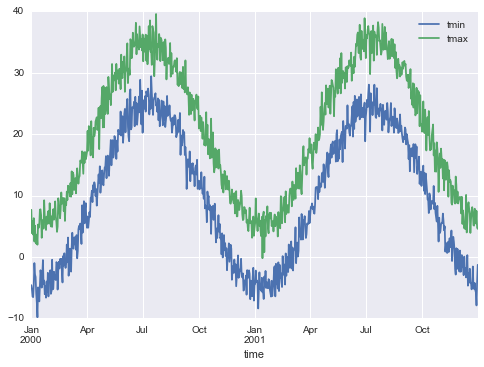

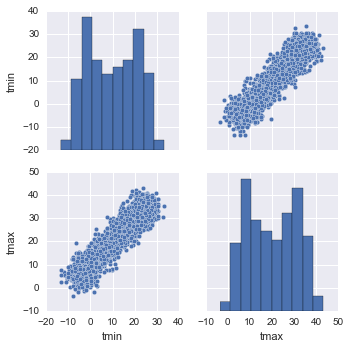

In [119]:
In [5]: ds.mean(dim='location').to_dataframe().plot()
sns.pairplot(df.reset_index(), vars=ds.data_vars)

In [93]:
from __future__ import division
import os
import sys
import re
from math import *

In [101]:
RIGHT, TOP, LEFT, BOTTOM = range(4)
EPSILON = 0.01
TAU = 2 * pi

X, Y, Z = (0, 1, 2)

In [95]:
ORIGIN      = ( 0, 0, 0)
UP_VEC      = ( 0, 0, 1)
RIGHT_VEC   = ( 1, 0, 0)
FORWARD_VEC = ( 0, 1, 0)
DOWN_VEC    = ( 0, 0,-1)
LEFT_VEC    = (-1, 0, 0)
BACK_VEC    = ( 0,-1, 0)

In [103]:
In [6]: sns.pairplot(df.reset_index(), vars=ds.data_vars)

NameError: name 'sns' is not defined

In [42]:
In [4]: xr.DataArray(np.random.randn(2, 3))
In [5]: data = xr.DataArray(np.random.randn(2, 3), [('x', ['a', 'b']), ('y', [-2, 0, 2])])

In [6]: data 

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.00284592,  0.68822271, -0.87953634],
       [ 0.28362732, -0.80536652, -1.72766949]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int32 -2 0 2

In [47]:
In [8]: data.values   

array([[ 0.00284592,  0.68822271, -0.87953634],
       [ 0.28362732, -0.80536652, -1.72766949]])

In [44]:
In [9]: data.dims

('x', 'y')

In [45]:
In [10]: data.coords

Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int32 -2 0 2

In [46]:
In [11]: data.attrs 

OrderedDict()

In [48]:
In [12]: data[[0, 1]]

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.00284592,  0.68822271, -0.87953634],
       [ 0.28362732, -0.80536652, -1.72766949]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int32 -2 0 2

In [49]:
In [13]: data.loc['a':'b']

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.00284592,  0.68822271, -0.87953634],
       [ 0.28362732, -0.80536652, -1.72766949]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int32 -2 0 2

In [50]:
In [14]: data.isel(x=slice(2))

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.00284592,  0.68822271, -0.87953634],
       [ 0.28362732, -0.80536652, -1.72766949]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int32 -2 0 2

In [51]:
In [15]: data.sel(x=['a', 'b'])

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.00284592,  0.68822271, -0.87953634],
       [ 0.28362732, -0.80536652, -1.72766949]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int32 -2 0 2

In [52]:
In [7]: xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [57]:
import xarray as xr
import numpy as np
import pandas as pd

np.random.seed(123)

times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset({'tmin': (('time', 'location'), tmin_values),
                 'tmax': (('time', 'location'), tmax_values)},
                {'time': times, 'location': ['IA', 'IN', 'IL']})

In [54]:
In [1]: ds

NameError: name 'ds' is not defined